In [ ]:
#Display and plotting imports
%pylab inline 
import seaborn as sns
sns.set()
from IPython.display import SVG

import pandas as pd

#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################

from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import decode_predictions

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

#Note I exclude the final dense layers by setting include_top=False,
#and add new ones to train from scratch below
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
#Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False    

#Establish new fully connected block
x = base_model.output
x = Flatten()(x)  # flatten from convolution tensor output  
x = Dense(500, activation='relu')(x) # number of layers and units are hyperparameters, as usual
x = Dense(500, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x) # should match # of classes predicted

#This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#This is the augmentation configuration used for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#This is the augmentation configuration used for testing:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#Flow from directory command in Keras
#This is a generator that will read pictures found in subfolers of 'Train'
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Train",                #This is the target directory
    target_size=(224, 224),                                    #All images will be resized to 224x224
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",                                  #Since we use categorical_crossentropy loss, we need categorical labels
    shuffle=True,
    seed=42
)

Found 2796 images belonging to 6 classes.


In [ ]:
#Flow from directory command in Keras
#This is a generator that will read pictures found in subfolers of 'Validation'
valid_generator = valid_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Validation",          #This is the target directory
    target_size=(224, 224),                                   #All images will be resized to 224x224
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",                                 #Since we use categorical_crossentropy loss, we need categorical labels
    shuffle=True,
    seed=42
)

Found 2763 images belonging to 6 classes.


In [ ]:
#Flow from directory command in Keras
#This is a generator that will read pictures found in subfolers of 'Test'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Test",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 3658 images belonging to 1 classes.


In [ ]:
#Fitting/Training the model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
87/87 [==============================] - 3427s 39s/step - loss: 1.2219 - accuracy: 0.6928 - val_loss: 0.4683 - val_accuracy: 0.8477
Epoch 2/5
87/87 [==============================] - 76s 871ms/step - loss: 0.2949 - accuracy: 0.9085 - val_loss: 0.3885 - val_accuracy: 0.8775
Epoch 3/5
87/87 [==============================] - 77s 882ms/step - loss: 0.2060 - accuracy: 0.9389 - val_loss: 0.3234 - val_accuracy: 0.8946
Epoch 4/5
87/87 [==============================] - 76s 876ms/step - loss: 0.1201 - accuracy: 0.9606 - val_loss: 0.5388 - val_accuracy: 0.8339
Epoch 5/5
87/87 [==============================] - 76s 876ms/step - loss: 0.1514 - accuracy: 0.9511 - val_loss: 0.4163 - val_accuracy: 0.8863


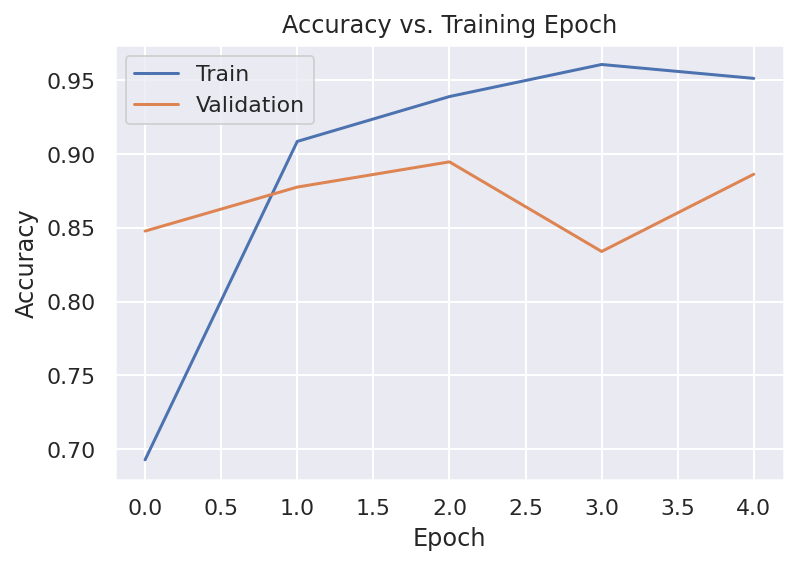

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy vs. Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation']);

In [ ]:
#Targeted Categories (numerical labels)
true_classes = valid_generator.classes

#Targeted Categories (labels)
class_labels = list(valid_generator.class_indices.keys())  

In [ ]:
#Sklearn confusion matrix
#Model Accuracy metrics
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(valid_generator.classes, y_pred)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')

class_labels = list(valid_generator.class_indices.keys())  
print(classification_report(valid_generator.classes, y_pred, target_names = class_labels))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[173 150  11  96 127  59]
 [189 184   8 109 186  73]
 [ 35  48   0  18  35  15]
 [104 113   2  55 100  32]
 [153 158   8  78 151  61]
 [ 51  71   2  34  52  22]]
Classification Report
                precision    recall  f1-score   support

        Adidas       0.25      0.28      0.26       616
    Air Jordan       0.25      0.25      0.25       749
          Kobe       0.00      0.00      0.00       151
Nike Air Force       0.14      0.14      0.14       406
  Nike Air Max       0.23      0.25      0.24       609
       Nike SB       0.08      0.09      0.09       232

      accuracy                           0.21      2763
     macro avg       0.16      0.17      0.16      2763
  weighted avg       0.20      0.21      0.21      2763



In [ ]:
class_labels

['Adidas', 'Air Jordan', 'Kobe', 'Nike Air Force', 'Nike Air Max', 'Nike SB']

In [ ]:
#cnn_pred_cifar = model.predict(x_test)
Y_pred = model.predict_generator(valid_generator)

#cnn_pred_cifar = np.argmax(cnn_pred_cifar,axis=1)
y_pred = np.argmax(Y_pred, axis=1)


#y_true = np.argmax(y_test_tf,axis=1)
y_true = np.argmax(valid_generator.classes ,axis=0)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

#Function to generate Confusion Matrix
def plot_confusion_matrix2(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.28084416 0.24350649 0.01785714 0.15584416 0.20616883 0.09577922]
 [0.25233645 0.24566088 0.01068091 0.14552737 0.24833111 0.09746328]
 [0.23178808 0.31788079 0.         0.1192053  0.23178808 0.09933775]
 [0.25615764 0.27832512 0.00492611 0.13546798 0.24630542 0.07881773]
 [0.25123153 0.25944171 0.01313629 0.12807882 0.24794745 0.1001642 ]
 [0.21982759 0.30603448 0.00862069 0.14655172 0.22413793 0.09482759]]


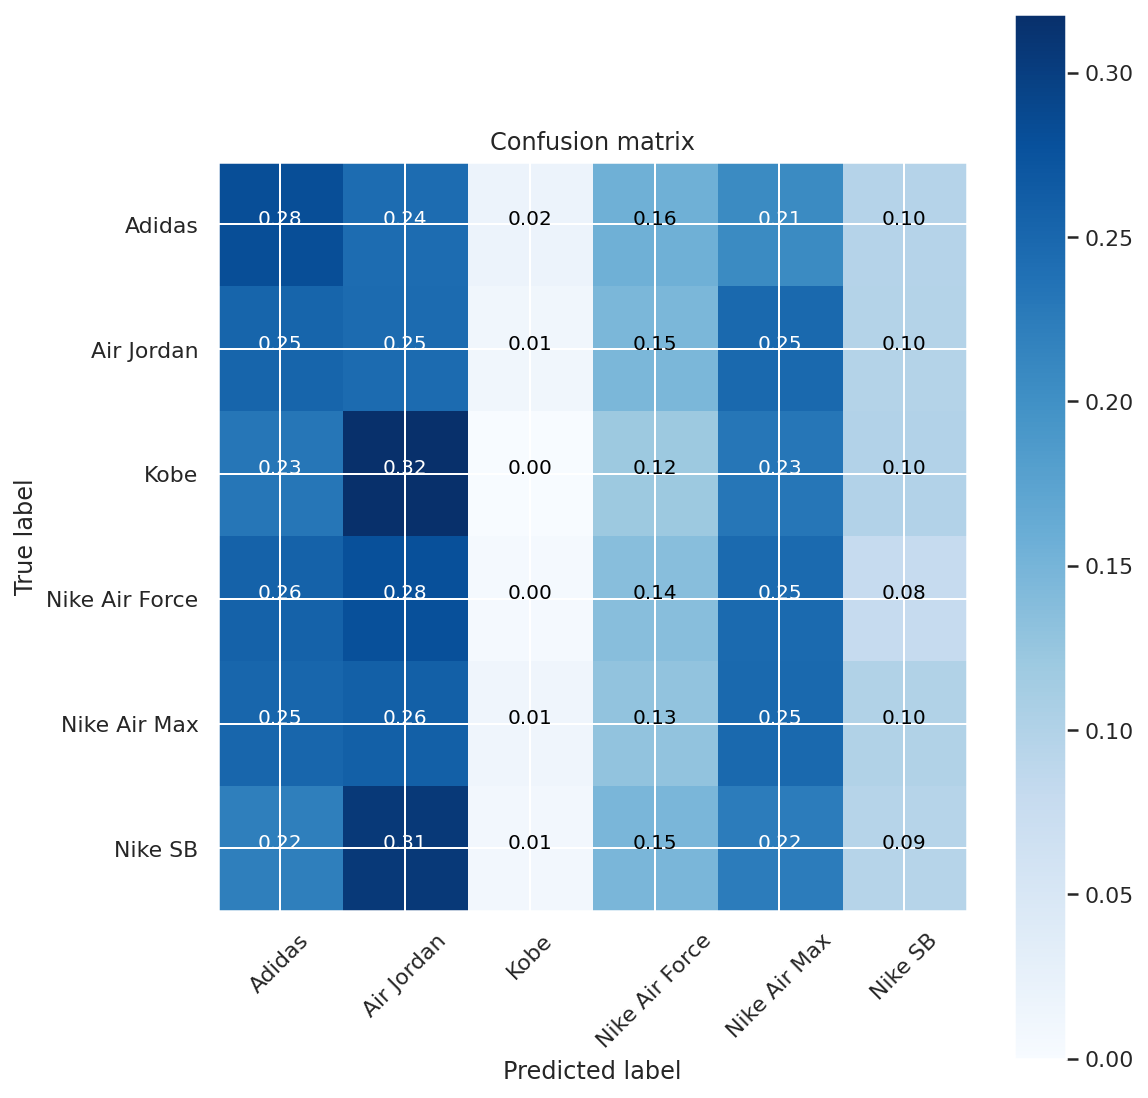

In [ ]:
#Confusion Matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix2(cm, class_labels)

In [ ]:
from keras.models import Model
import keras
inter_model = keras.Model(model.input, model.layers[-2].output)
inter_output = inter_model.predict_generator(test_generator)

In [ ]:
shoe_name = test_generator.filenames

NameError: ignored

In [ ]:
#Get vector from CNN and pass through pair wise distance
from sklearn.metrics import pairwise_distances
d = pairwise_distances(inter_output,metric='cosine')

[shoe_name[m] for m in d[80].argsort()[:20]] #for Sneaker #1


NameError: ignored

In [ ]:
#Get probabilities for each class
proba = model.predict(valid_generator)        

#Get class names for top 10 categories
sorted_categories = np.argsort(proba[0])[:-7:-1]

#Print classes and corresponding probabilities
for i in range(6):
    print("{}".format(class_labels[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

Nike Air Max (1.0)
Adidas (0.000133)
Air Jordan (1.68e-05)
Nike Air Force (8.9e-08)
Nike SB (1.06e-08)
Kobe (1.09e-09)
